In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

A __unit random walk__ is a sequence of random variables defined as the cumulative sum of mean 0, variance 1 random variables $X_{i}$:

$Z_{n} = \sum_{i=1}^{n} X_{i}$ 

We trivially have that $E[Z_{n}] = 0$ and Var$(Z_{n})=n$, although of course $Z_{i}$ and $Z_{i+1}$ are not independent.

For a non-zero mean, unit variance sequence with finite means and variances, we can define $Z_{i}\equiv \frac{(X_{i} - \mu_{i})}{\sigma_{i}}$, analyze $Z_i$, and undo any scaling or translations after convergence using the CMT.

<IPython.core.display.Javascript object>


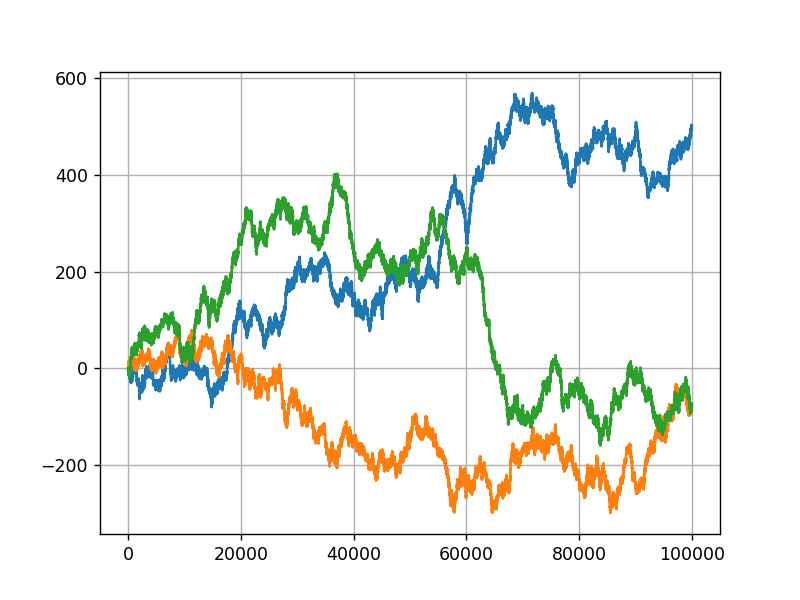

In [3]:
np.random.seed(126)
n = 100000
for z in range(3):
    theta = np.random.normal(0,1,size=n).cumsum()
    plt.plot(np.arange(n), theta)
plt.grid(True)

Random walk fact 1: in a particular sense defined below, random walks "grow" away from 0 at a rate of $\sqrt{n}$.

<IPython.core.display.Javascript object>


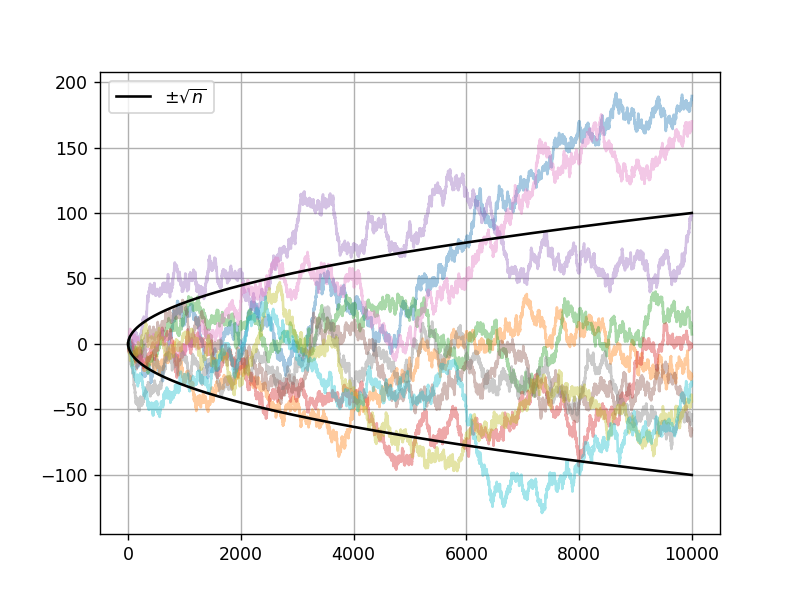

In [26]:
n = 10000
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    plt.plot(np.arange(n), theta, alpha=.4)
plt.plot(np.arange(n), np.sqrt(np.arange(n)), 'k-', label='$\pm\sqrt{n}$')
plt.plot(np.arange(n), -np.sqrt(np.arange(n)), 'k-')
plt.legend()
plt.grid(True)

You can see below that $n^{0.7}$ diverges from 0 faster than a random walk.

<IPython.core.display.Javascript object>


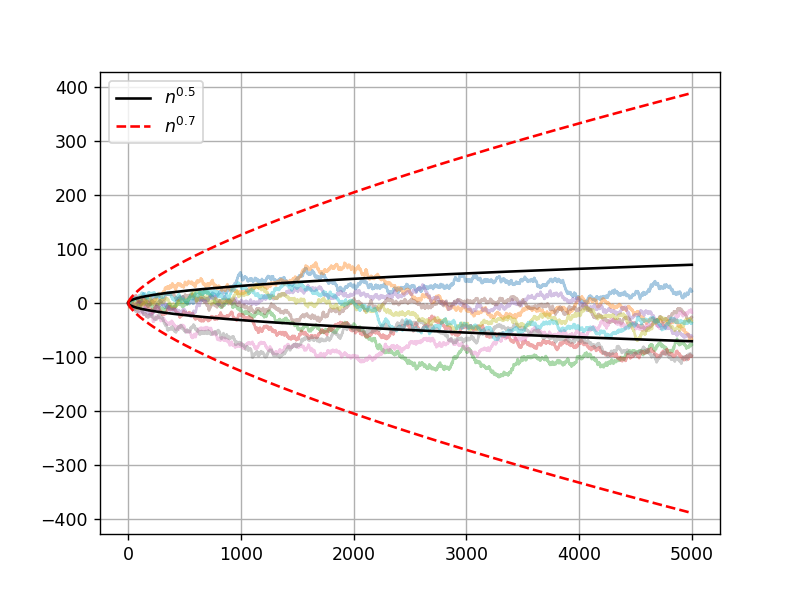

In [28]:
n = 5000
cr = .7
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    plt.plot(np.arange(n), theta, alpha=.4)
plt.plot(np.arange(n), np.sqrt(np.arange(n)), 'k-', label='$n^{0.5}$')
plt.plot(np.arange(n), -np.sqrt(np.arange(n)), 'k-')
plt.plot(np.arange(n), (np.arange(n))**cr, 'r--', label='$n^{0.7}$')
plt.plot(np.arange(n), -(np.arange(n))**cr, 'r--')
plt.legend()
plt.grid(True)

Given this slow rate of divergence from 0, we can see that dividing each term of a random walk by $n$ will send the sequence to 0 fairly quickly:

$\bar{Z}_{n} = \frac{1}{n} \sum_{i=1}^{n} X_{i} \rightarrow_{p} 0$ 



<IPython.core.display.Javascript object>


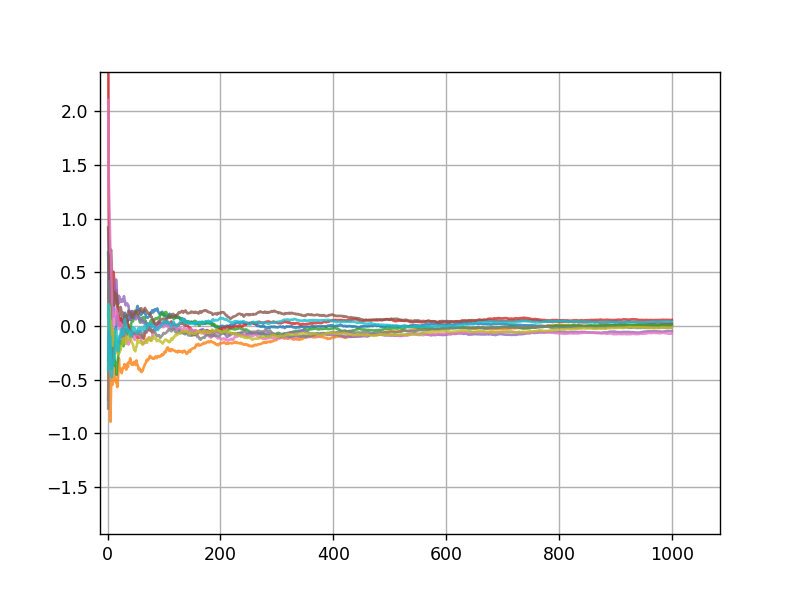

In [13]:
n = 1000
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    plt.plot(np.arange(1,n+1), theta/np.arange(1,n+1), alpha=.8)
plt.grid(True)

The question is then _how_ quick the convergence to 0 is. Using different scaling factors tells us differences in speeds. For any $\kappa>.5$ we have that $\bar{Z^\kappa}_{n} = \frac{1}{n^{\kappa}} \sum_{i=1}^{n} X_{i} \rightarrow_{p} 0$, so this is not helpful.

On the other hand, using the scaling factor $\sqrt{n}$ both prevents the random walk paths from diverging to $\infty$ as well as from collapsing to 0:


$\sqrt{n} Z_{n} = \frac{1}{\sqrt{n}} \sum_{i=1}^{n} X_{i}$ 

<IPython.core.display.Javascript object>


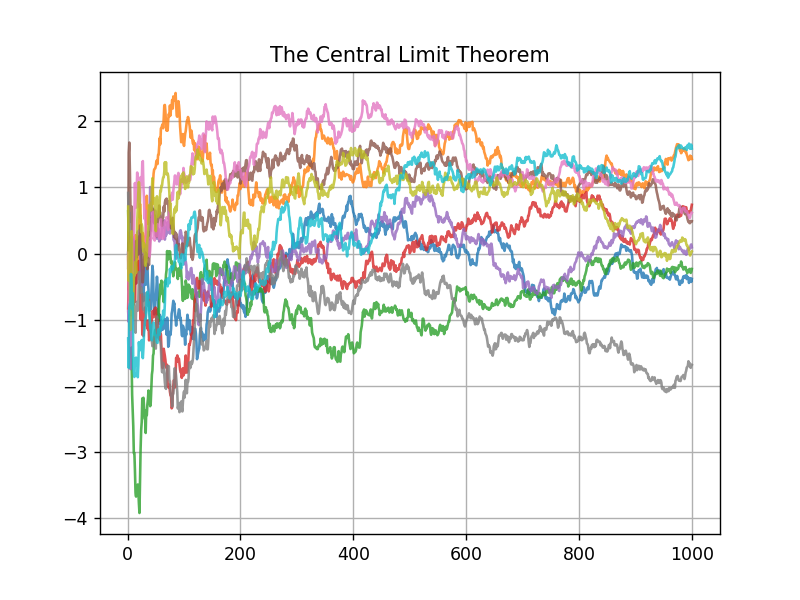

In [21]:
n = 1000
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    plt.plot(np.arange(1,n+1), theta/np.sqrt(np.arange(1,n+1)), alpha=.8)
plt.title('The Central Limit Theorem')
plt.grid(True)

The CLT is incredibly well known. What is less well known is that there are other scaling factors that are informative, although we won't be using them extensively in this class. The _Law of the Iterated Logarithm_ states that the scaling factor $\sqrt{2 n \log{\log{n}}}$ (faster than $\sqrt{n}$, slower than any $n^{-\alpha}$, $\alpha>.5$) will prevent any particular sample path from leaving the bounds [-1,1] as $n\rightarrow \infty$.

<IPython.core.display.Javascript object>


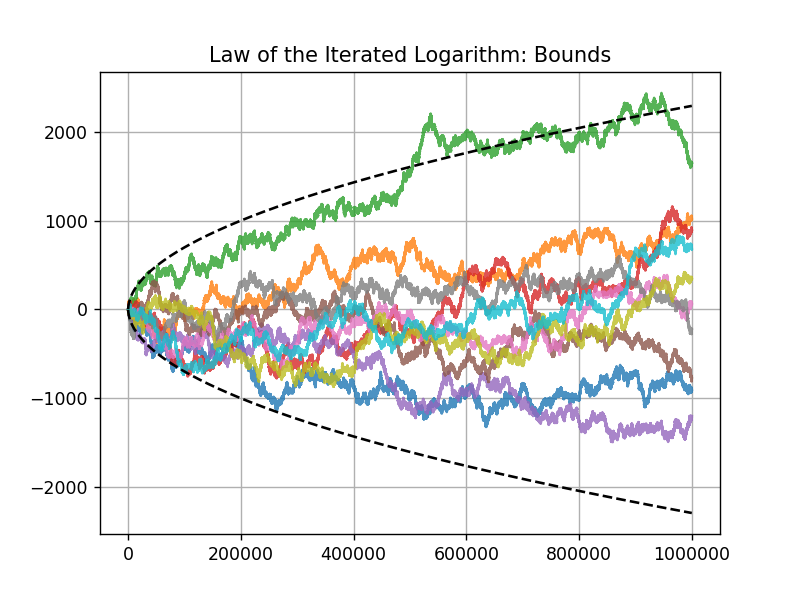

<IPython.core.display.Javascript object>


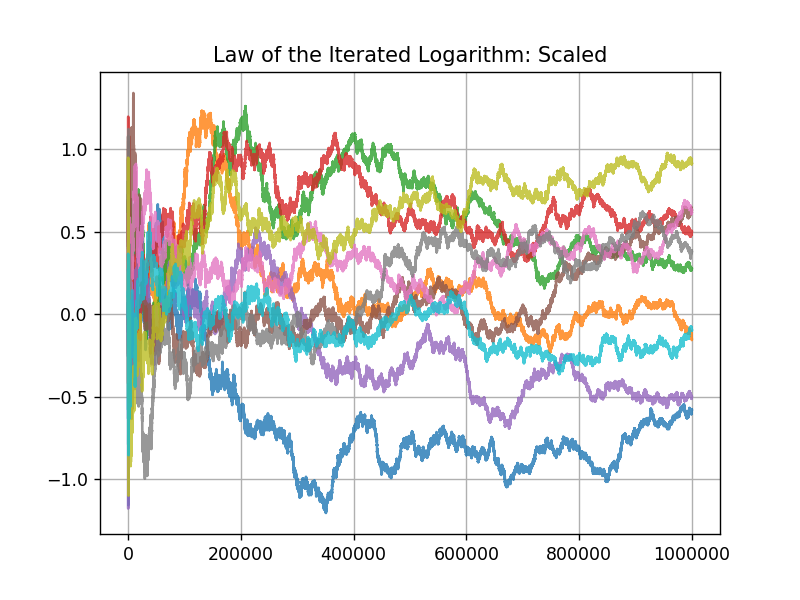

In [23]:
n = 1000000
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    x = np.arange(10,n+10)
    plt.plot(x, theta, alpha=.8)
plt.plot(x, np.sqrt(2 * x * np.log(np.log(x))), 'k--')
plt.plot(x, -np.sqrt(2 * x * np.log(np.log(x))), 'k--')
plt.grid(True)
plt.title('Law of the Iterated Logarithm: Bounds')
plt.figure()
for z in range(10):
    theta = np.random.normal(0,1,size=n).cumsum()
    x = np.arange(10,n+10)
    plt.plot(x, theta/np.sqrt(2 * x * np.log(np.log(x))), alpha=.8)
plt.title('Law of the Iterated Logarithm: Scaled')
plt.grid(True)